In [70]:
import requests
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

In [71]:
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    

In [104]:
url = 'http://cloth.gay:8000/server/print-message/'
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(response)

{'message': 'Message printed'}


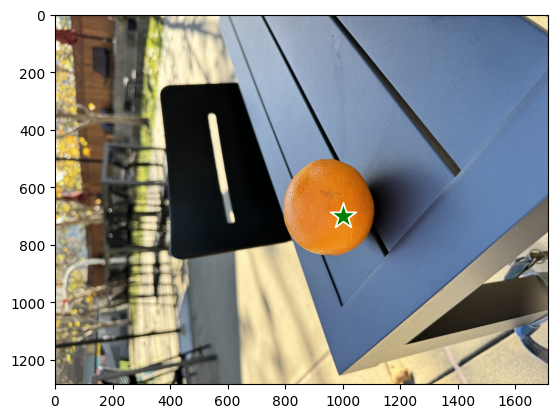

Image mask


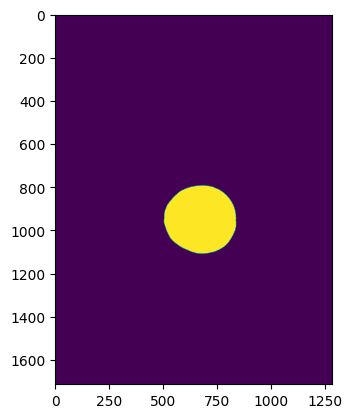

In [103]:
url = 'http://cloth.gay:8000/server/image-upload/'
file_path = 'orange.jpg'
img_client = Image.open(file_path)
# This is done for display reasons since pyplot cant display the portrait mode image orientation it is all sorts of messed up
img_client = img_client.transpose(Image.FLIP_TOP_BOTTOM)
# When passing to the server the points will be inverted i.e [x,y] becomes [y,x] due to the above
input_point = np.array([[1000,700]])
input_label = np.array([1])

plt.figure()
plt.imshow(img_client)

show_points(input_point, input_label, plt.gca())
plt.show()

with open(file_path, 'rb') as file:
    files = {'image': file}
    response = requests.post(url, files=files)
if response.status_code == 200:
    data = response.json()
    print(data['message'])
    encoded_image = data['image_data']
    decoded_image =  base64.b64decode(encoded_image.encode('utf-8'))
    img_server = Image.open(BytesIO(decoded_image))
    plt.figure()
    plt.imshow(img_server)

else:
    print(response)


In [114]:
import json
url = 'http://cloth.gay:8000/server/test-json-nest/'
data = {"text": "hey", "point": [{"x": 3, "y": 4}, {"x": 2, "y": 5}]}
response = requests.post(url, data=json.dumps(data), headers={'Content-Type': 'application/json'})
print(response)

<Response [200]>


In [134]:
url = 'http://cloth.gay:8000/server/test-complex/'
file_path = 'orange.jpg'
with open(file_path, 'rb') as file:
    data = {"pos_points": [{"x": 3, "y": 4}, {"x": 2, "y": 5}], "neg_points": [{"x": 3, "y": 4}, {"x": 2, "y": 5}]}
    json_data = json.dumps(data)
    payload = {
        'image': file,
        'json': ('data.json', json_data, 'application/json')
    }
    response = requests.post(url, files=payload)
    print(response)

<Response [200]>
